In [1]:
plots="/sharedFolder/Results/Ligase4/temporary/"
dir.create(plots)
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
library("vioplot")
results="/sharedFolder/Results/Ligase4/"
previousResults="/sharedFolder/Results/Hotspot/"
library("ggVennDiagram");
library("ggplot2")
library("GenomicRanges")
path="/sharedFolder/Data/1_HTGTS/3_JunctionPaper/junction_pooled"
rider2="/sharedFolder/rider/RIDER_v0.2.jar"
hotspotpath="/sharedFolder/Results//Hotspot/"
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
gg=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2]),end=as.numeric(Database[,3])))    
library(eulerr)


Warning message in dir.create(plots):
“'/sharedFolder/Results/Ligase4/temporary' already exists”
Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading req

In [39]:
plots

[1] "/sharedFolder/Results/Ligase4/temporary/"

In [29]:
filePlots=list.files(plots,pattern=".csv")
len <- 3
toRemoveList <- vector(mode = "list", length = 20)
names(toRemoveList)=filePlots

a=list.files(path)[grep("Ligase4",list.files(path))]
b=list.dirs(hotspotpath,recursive=FALSE)
b=b[grep("Ligase4",b)]

conditions=c("DMSO","Taze","Vale")
dir.create(paste(plots,"filtered",sep="/"))
count=1
for(i in conditions){
    oneFile=a[grep(i,a)]
    oneFileS=b[grep(i,b)]
    pathone=list.dirs(oneFileS,recursive=FALSE)
    oneFileS=list.files(list.dirs(oneFileS,recursive=FALSE),pattern="bed")
    oneFileS=paste(pathone,oneFileS,sep="/")
    for(j in conditions){
        if(((i=="Taze" && j =="Vale") || (j=="Taze" && i =="Vale"))){
        twoFile=a[grep(j,a)]
        twoFileS=b[grep(j,b)]
        pathtwo=list.dirs(twoFileS,recursive=FALSE)
        twoFileS=list.files(list.dirs(twoFileS,recursive=FALSE),pattern="bed")
        twoFileS=paste(pathtwo,twoFileS,sep="/")
        if(i!=j){
            toRemove=c()
            print(oneFileS)
            print(twoFileS)
            #system(paste("java -jar ",rider2," -task ValSite -s_file ",oneFileS," ",twoFileS," -e_file ",path,"/",oneFile," -c_file ",path,"/",twoFile," -genome mm9 -out_dir ",plots,"/",i,"_",j,sep=""))
            #system(paste("chmod -R 777 ",plots,"/",i,"_",j,sep=""))
            compare=read.table(paste(plots,"/",i,"_",j,"/",list.files(paste(plots,"/",i,"_",j,sep=""),pattern=".txt"),sep=""),header=TRUE,sep="\t")
            for(n in which(compare[,16]>0.05)){
                tempGG=GRanges(seqnames=as.matrix(compare[n,2]),ranges=IRanges(start = as.numeric(compare[n,3]),end=as.numeric(compare[n,4])))    
                toRemove=append(toRemove,unique(Database[findOverlaps(tempGG,gg)@to,7]))
                }
            rpmPlot=Database[grep("Ligase4",Database[,6]),]
            rpmPlot=unique(union(rpmPlot[grep("Taze",rpmPlot[,6]),7],rpmPlot[grep("Vale",rpmPlot[,6]),7]))
            toRemove=intersect(sapply(toRemove,FUN=toString),rpmPlot)
            print(count)
            print(toRemove)
            if(length(toRemoveList[[count]])==0){
            toRemoveList[[count]]=append(toRemoveList[[count]],toRemove)
            }else{
            toRemoveList[[count]]=intersect(toRemoveList[[count]],toRemove)
        }
            }
    }
    count=count+1
    }

}


Warning message in dir.create(paste(plots, "filtered", sep = "/")):
“'/sharedFolder/Results/Ligase4/temporary//filtered' already exists”


[1] "/sharedFolder/Results//Hotspot//Ligase4_KO_Taze/results-20221019_162816/11__Ligase4_KO_Taze-RIDER.clean-20221019_162816.bed"
[1] "/sharedFolder/Results//Hotspot//Ligase4_KO_Vale/results-20221019_162958/12__Ligase4_KO_Vale-RIDER.clean-20221019_162958.bed"
[1] 6
  [1] 701 702 703 471 472 704 705 706 707 708 709 478 710 711 712 713 714 715
 [19] 716 717 718 719 720 722 489 490 723 724 725 493 726 727 729 730 731 732
 [37] 501 733 734 504 735 736 737 738 739 740 741 742 743 744 745 746 747 748
 [55] 749 751 752 753 522 754 755 526 756 757 758 759 760 761 762 532 763 535
 [73] 764 765 538 766 767 768 769 770 771 772 773 774 549 775 776 777 779 780
 [91] 781 782 557 783 784 785 786 787 788 563 789 564 790 567 791 792 793 794
[109] 795 796 797 798 799 800 801 582 802 803 804 805 806 807 808 809 810 811
[127] 812 813 814 595 596 815 816 599 817 818 819 820 821 822 823 824 825 609
[145] 826 827 828 829 830 831 832 833 835 836 837 838 840 841 625 626 842 843
[163] 844 845 846 631 847 848 84

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': error in evaluating the argument 'x' in selecting a method for function 'grep': incorrect number of dimensions


In [30]:
rpmPlot=Database[grep("Ligase4",Database[,6]),]
Taze=unique(rpmPlot[grep("Taze",rpmPlot[,6]),7])
Vale=unique(rpmPlot[grep("Vale",rpmPlot[,6]),7])
Taze=setdiff(Taze,intersect(toRemoveList[[6]],toRemoveList[[8]]))
Vale=setdiff(Vale,intersect(toRemoveList[[6]],toRemoveList[[8]]))


In [31]:
Taze

[1] 474 728 498 503 513 530 534 539 766 566 578 590 845 633 634 637 871 651 673
[20] 695

In [32]:
Vale

[1] 705 728 734 735 742 746 757 766 775 828 845 858 865 871 879 912 917

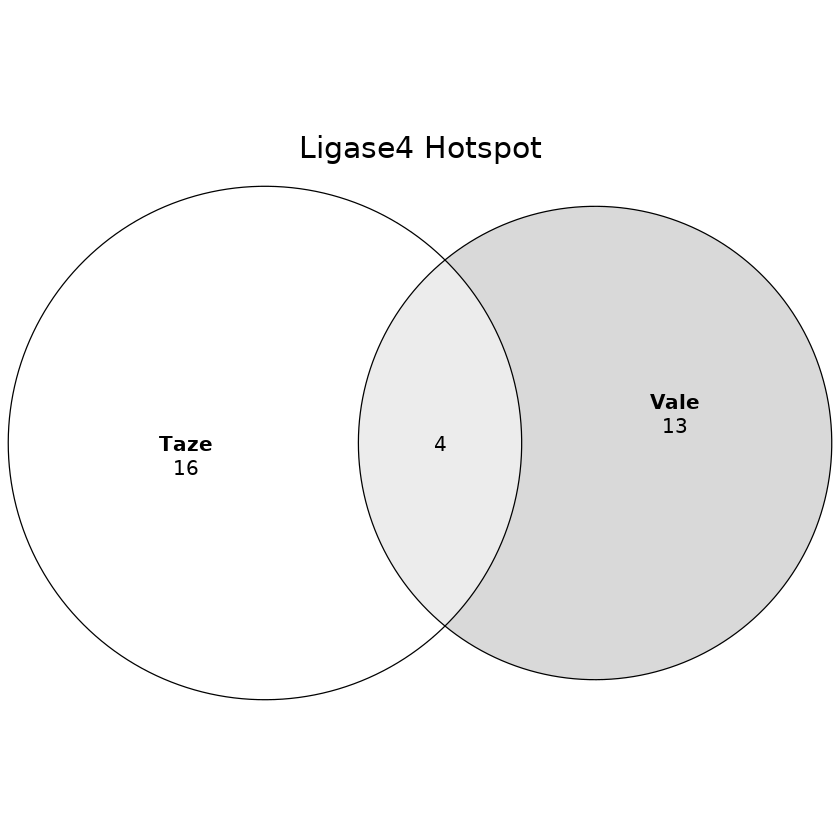

In [33]:
fit1 <- euler(c("Taze" = length(setdiff(Taze,Vale)), "Vale" = length(setdiff(Vale,Taze)),"Taze&Vale"=length(intersect(Taze,Vale)) ))
plot(fit1,quantities = TRUE,main="Ligase4 Hotspot")

integer(0)